# 07-1. 인공 신경망

## 패션 MNIST
   * 텐서플로우 사용

In [1]:
import tensorflow as tf
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


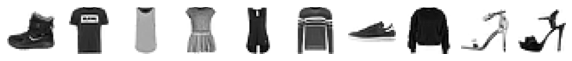

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기
 * 모델이 지금 6만개가 되기에 확률적 경사 하강법 -> SGDClassifier 사용
 

In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape)

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss="log", max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores["test_score"]))

0.8195666666666668


## 인공 신경망
  * 이론 설명

## 인공 신경망으로 모델만들기

In [10]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [11]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [12]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [13]:
# 뉴런 개수 10, 뉴런 출력에 적용할 함수 - softmax, 입력의 크기
dense = keras.layers.Dense(10, activation="softmax", input_shape=(784,))

In [14]:
model = keras.Sequential(dense)

* 소프트맥스 함수는 뉴런의 출력에 바로 적용되어 보통 층의 일부로 나타낸다.

## 인공 신경망으로 패션 아이템 분류하기
* (사이킷런과 달리) 케라스는 훈련 전 단계에서 model의 complie() 메소드를 수행한다.

In [15]:
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

* 4장에서 이진 분류를 진행 시, 이진 크로스 엔트로피 손실 함수를 사용한다.
* 다중 분류에서는 크로스 엔트로피 손실 함수를 사용한다.
* 케라스에선 이 두개의 손실 함수를 각각
   * 이진 분류 : binary_crossentropy
   * 다중 분류 : categorical_crossentropy
* 라고 칭한다.

In [16]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [17]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 2ms/step - loss: 0.6096 - accuracy: 0.7920
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4789 - accuracy: 0.8392
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4582 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4453 - accuracy: 0.8525
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4376 - accuracy: 0.8547


* 에포크당 손실 정확도를 보여주고, 이제 따로 떼어낸 검증 세트에서 모델 성능 확인하자.
* evaluate() 함수를 사용한다.

In [18]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4473 - accuracy: 0.8483


[0.44727250933647156, 0.8483333587646484]

아주 이상적으로 책보다 잘 됬다. ( 랜덤으로 훈련하기에 더 나은 결과)

## 인공 신경망 모델로 성능 향상 - (07-1 총리뷰)

## 마무리 문제 1번 - 입력 특성 100개 뉴런 10개

* 100 * 10 + 10 (뉴런 1개당 필요한 절편) = 1010개


# 07-2. 심층 신경망
* 앞 단원에서 만들었던 인공 신경망에 층을 여러개 추가하여 MNIST 데이터 셋을 분류 후 케라스로 심층 신경망 만들기

## 두개의 층


In [19]:
import tensorflow as tf
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [21]:
dense1 = keras.layers.Dense(100, activation="sigmoid", input_shape=(784,))
dense2 = keras.layers.Dense(10, activation="softmax")

## 심층 신경망 만들기 (DNN)
* Deep Neural Network

In [22]:
model = keras.Sequential([dense1, dense2])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 층을 추가하는 다른 방법
- Sequential 대신 Dense 객체 사용하기

In [24]:
model = keras.Sequential([
                          keras.layers.Dense(100, activation="sigmoid", input_shape=(784,),
                                             name="hidden"),
                          keras.layers.Dense(10, activation="softmax", name="output")],
                         name = "패션 MNIST 모델")


In [25]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


* 위처럼하면 생성자가 길어져 add 함수를 쓰는게 편리하다

In [26]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5610 - accuracy: 0.8076
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4083 - accuracy: 0.8527
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3738 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3513 - accuracy: 0.8736
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3340 - accuracy: 0.8787


* 추가 시킨 레이어때문에 성능이 향상 되었다. (+0.2)


## 렐루 함수
* ReLU 함수
* 초창기에 은닉층에서 가장 많이 사용된 활성화 함수는 (아까 쓴) 시그모이드
  * 시그모이드 함수는 오른쪽 위로 갈수록 그래프가 누워있으므로 올바른 출력에 대응하지 못함.

* 렐루 함수는 입력이 0일때 0이며, 양수일땐 거의 y = x 선그래프 형태의 형태
* 패션 데이터는 넘파이의 reshape를 사용해 1차원으로 펼쳤는데,
* 여기선 케라스의 Flatten을 사용해본다.
* Flatten 클라스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할이므로 가중치나 절편이 없다.
  * 인공 신경망 성능에 기여하는 것이 없다.

In [29]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


* Flatten 층을 신경망 모델에 추가하면 입력값의 차원을 짐작할수 있는게 장점이다. -> Output shape


In [31]:
(train_input, train_target), (test_input, test_target) = tf.keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [32]:
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5274 - accuracy: 0.8126
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3891 - accuracy: 0.8605
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3503 - accuracy: 0.8735
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3325 - accuracy: 0.8803
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3184 - accuracy: 0.8865


## 옵티마이저
* 하이퍼파라미터 설정
* 여러개의 은닉층을 추가 가능하다. -> 하이퍼파라미터 지정.

**케라스**
* 케라스는 기본적으로 미니배치 경사 하강법을 사용하며, 미니배치 수는 32개입니다.
* fit() 메서드의 batch_size 매개변수를 이를 조정할수 있고, 역시 하이퍼파라미터입니다.
* compile() 메서드는 기본 경사 하강법 알고리즘 - RMSprop을 사용한다.

가장 기본이 되는 옵티마이저는 **SGD**

In [33]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [34]:
# 위에 실행 시킨 코드와 100% 일치함 - 위에는 자동으로 sgd 객체를 만들어준 것이고 , 이 코드는 수동으로 만든 것.
sgd = keras.optimizers.SGD(learning_rate=0.1) # 디폴트는 0.01
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics="accuracy")

* 다음 추가적으로 할 작업 : 모멘텀 최적화
  * 모멘텀 최적화의 매개변수는 0.9로 설정한다
* SGD 클라스의 nesterov를 활성화 시키면 네스테로프 모멘텀 최적화를 사용한다.

In [35]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

* 네스테로프 모멘텀 최적화의 경후 기본 확률적 경사 하강법 보다 더 나은 성능이다.
  * 모멘텀 최적화를 2번 반복하여 구현한다.
* 최적점에 수렴하는 것을 적응적 학습률(adaptive learning rate)이라 한다.
* 적응적 학습률애 사용하는 옵티마이저는 Adagrad 와 RMSprop이다. 이중 디폴트는 RMSprop이다.

In [36]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss="sparse_categorical_crossentropy", 
              metrics="accuracy")

In [37]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss="sparse_categorical_crossentropy", 
              metrics="accuracy")

모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam
* 3개의 클라스 모두 learning_rate가 0.001을 사용한다.
  * RMSprop , Adam, SGD

In [38]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [39]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics="accuracy")
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5245 - accuracy: 0.8164
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3920 - accuracy: 0.8595
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3526 - accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3243 - accuracy: 0.8825
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3056 - accuracy: 0.8873


In [40]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3680 - accuracy: 0.8677


[0.36795496940612793, 0.8676666617393494]

# 07-3. 신경망 모델 훈련

## 손실곡선
* keras의 fit 메소드는 History 객체를 반환한다.

In [41]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = tf.keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [42]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation="relu"))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

이전과 똑같은 모델을 만드나 if 구문으로 역할은 model_fn() 함수에 케라스층을 추가시, 은닉층 뒤에 또 하나의 층을 추가하는 것.

In [43]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


fit()의 결과를 History에 담으면

In [44]:
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [45]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


손실과 정확도를 맷플롯으로 그리기

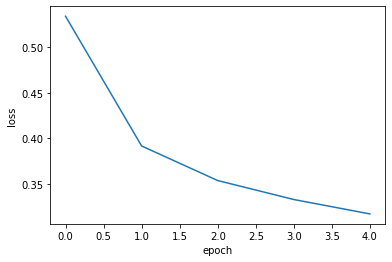

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

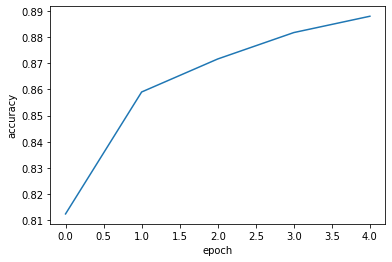

In [47]:
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

에포크가 높아질수록 손실은 낮아지고 정확성은 올라가므로 횟수를 20으로 증가시키고 다시 실행

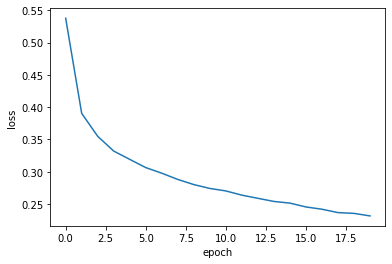

In [48]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

예상대로 손실 값이 더 감소한다.
   * 하지만, 이전보다 더 나은 모델을 훈련한 것인가?

## 검증 손실
 * 확률적 경사 하강법 -> 과대/과소 적합과 에포크의 관계를 알아봤다.
 * 이와 마찬가지로 검증 세트에 대한 점수도 필요하다.

In [51]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target))

In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


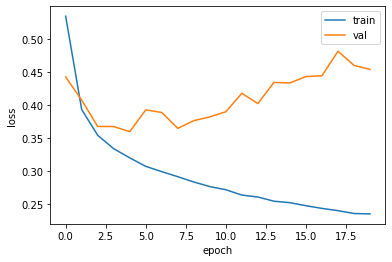

In [55]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

* 옵티마이저 하이퍼파라미터를 조정해서 과대적합을 완화하도록 한다.
    * RMprop 옵티마이저를 사용한다.

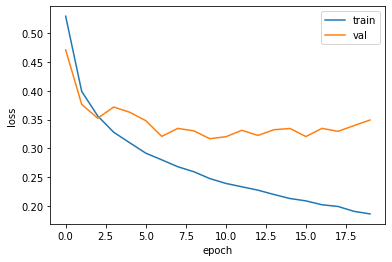

In [57]:
model = model_fn()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

## 드롭아웃
* 드롭아웃은 딥러닝의 아버지로 불리우는 제프리 힌턴의 소개로
  * 훈련과정 중 일부 뉴런을 (은닉층 단계에 끼어들어) 랜덤하게 꺼서 출력을 0으로 만들어 과대적합을 막는다.

In [59]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", 
              metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

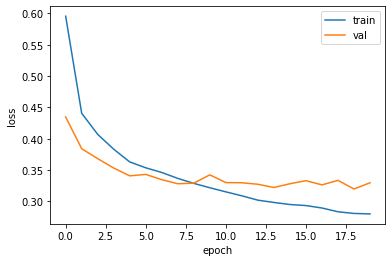

In [62]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

* 결론적으로 10이 적당한 에포크였다는 사실을 알게된다.

## 모델 저장과 복원
* 에포크를 10으로 조정하고 모델 훈련하기

In [65]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [66]:
model.save_weights("model-weights.h5")

In [67]:
model.save("model-whole.h5")

In [68]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Sep 28 09:39 model-weights.h5
-rw-r--r-- 1 root root 981736 Sep 28 09:47 model-whole.h5


In [69]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5")

모델 파라미터 두개를 사용했는데
* load_weights()
* save_weights()
저장했던 모델이 정확히 같은 구조를 가져야 에러가 발생하지 않는다.

In [71]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.881


In [73]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3299 - accuracy: 0.8810


[0.3299117684364319, 0.8809999823570251]

## 콜백
* keras.callbacks
* fit() 메서드의 callbacks
* ModelCheckpoint
  * save_best_only=True (매개변수)를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할수 있다.

In [76]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [77]:
model = keras.models.load_model("best-model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3137 - accuracy: 0.8909


[0.31369733810424805, 0.890916645526886]

ModelCheckpoint가 가장 낮은 검증 점수의 모델을 자동으로 저장하나, 20번의 에포크는 계속 진행된다.
* 이때 과대적합이 시작전에 훈련을 중지하는 것을 **조기 종료** 라고 하며 (early stopping) 규제 방법중 하나이다.

* 조기 종료를 위해서 EarlyStopping 콜백을 제공하고, patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다.
  * patience = 2 일경우 2번 연속 향상되지 않을시 훈련을 중지한다.
  * restore_best_weight를 True로 둘 경우 감장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.

두개를 적용해보겠다.


In [79]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

In [80]:
print(early_stopping_cb.stopped_epoch)

13


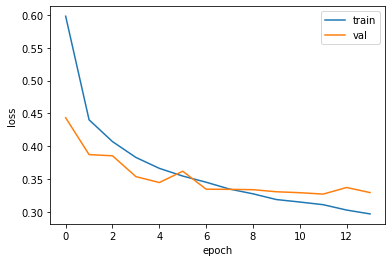

In [83]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","val"])
plt.show()

In [84]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8834


[0.3270812928676605, 0.8834166526794434]